# Systèmes décisionnels & Data Mining

In [11]:
# IPYNB Header
from typing import List, Tuple, Set

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Mining & Règles d'association

In [15]:
class Miner:
    def __init__(self, data:pd.DataFrame, min_support, min_confidence,header=None):
        self.data = data
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.__header = header

    def __normalized(self, value):
        if value == 0 or value == False:
            return 0
        if value == 1 or value == True:
            return 1

    def __contains(self, X:Set, i:int):
        if self.__header == None or self.__header == False:
            return X.issubset(self.data.iloc[i])
        else:
            r, s = self.data[list(X)].iloc[i], 0
            for j in range(len(r)):
                s += self.__normalized(r[j])

            return s == len(X)

    def __count(self, X:Set) -> int:
        count = 0
        for i in range(len(self.data)):
            if (self.__contains(X, i)):
                count += 1

        return count
    
    def __gen_frequent(self) -> Set:
        frequents = {}
        if (self.__header == True):
            frequents = set(self.data.columns)

        return frequents
    
    def support(self, X:Set) -> float:
        return self.__count(X) / (len(self.data))
    
    def confidence(self, X:Set, Y:Set) -> float:
        return self.support(X | Y) / self.support(Y)
    
    def lift(self, X:Set, Y:Set) -> float:
        return self.support(X | Y) / (self.support(X) * self.support(Y))
    
    def association_rules(self, X:Set) -> pd.DataFrame:
        rules = [] #power_set(X)
        frequent_items = { 'itemsets': [], 'support' : [] }

        for r in rules:
            r_support = self.support(r)
            if (r_support >= self.min_support):
                frequent_items['itemsets'].append(r)
                frequent_items['support'].append(r_support)

        return pd.DataFrame(frequent_items)

## Workshop 1

In [12]:
store_data = pd.read_csv('./store_data.csv')
store_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
miner = Miner(store_data, min_support=0.0045, min_confidence=0.2, header=None)
a_s = miner.support({'avocado', 'almonds'})
print(a_s)

0.0016


## Workshop 2

### Example 1

In [2]:
data = {
    'Onion' : [1,0,0,1,1,1],
    'Potato': [1,1,0,1,1,1],
    'Burger': [1,1,0,0,1,1],
    'Milk'  : [0,1,1,1,0,1],
    'Beer'  : [0,0,1,0,1,0]
}

df = pd.DataFrame(data)

# Frequent items / L_1
frequent_itemsets_1 = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)
frequent_itemsets_1

/home/kodascii/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Onion, Potato)"
5,0.500000,"(Burger, Onion)"
6,0.666667,"(Burger, Potato)"
7,0.500000,"(Milk, Potato)"
8,0.500000,"(Burger, Onion, Potato)"


In [3]:
rules = association_rules(frequent_itemsets_1, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf,0.500000
1,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667,1.000000
2,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
3,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,0.111111,inf,0.500000
5,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,0.111111,1.666667,1.000000
6,"(Burger, Onion)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,0.083333,inf,0.333333
7,"(Burger, Potato)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
8,"(Onion, Potato)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333
9,(Burger),"(Onion, Potato)",0.666667,0.666667,0.500000,0.75,1.125,0.055556,1.333333,0.333333


### Example 3

In [4]:
movies = pd.read_csv('./movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
movies_ohe = movies.drop(labels='genres', axis=1).join(movies.genres.str.get_dummies())
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
stat1 = movies_ohe.drop(labels=['title', 'movieId'], axis=1).apply(pd.value_counts)
stat1 = stat1.transpose().drop(0,axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})
stat2 = stat2[stat2['genre_count']==1].drop('movieId',axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)
stat

,No. of movies,title,No. of movies with only 1 genre
Drama,4365,Nixon (1995)Othello (1995)Dangerous Minds (199...,1170
Comedy,3315,Father of the Bride Part II (1995)Four Rooms (...,809
Thriller,1729,"Jade (1995)Safe (1995)Tie That Binds, The (199...",74
Action,1545,Sudden Death (1995)Fair Game (1995)Under Siege...,39
Romance,1545,Jack and Sarah (1995)Hustler White (1996)Kama ...,14
Adventure,1117,"Mark of Zorro, The (1940)Beyond the Poseidon A...",11
Crime,1100,Coup de torchon (Clean Slate) (1981)Gridlock'd...,11
Horror,877,Lord of Illusions (1995)Castle Freak (1995)Cem...,183
Sci-Fi,792,2010: The Year We Make Contact (1984)Meteor (1...,17
Fantasy,654,"Andalusian Dog, An (Chien andalou, Un) (1929)E...",3


Text(0.5, 1.0, 'distribution of number of genres')

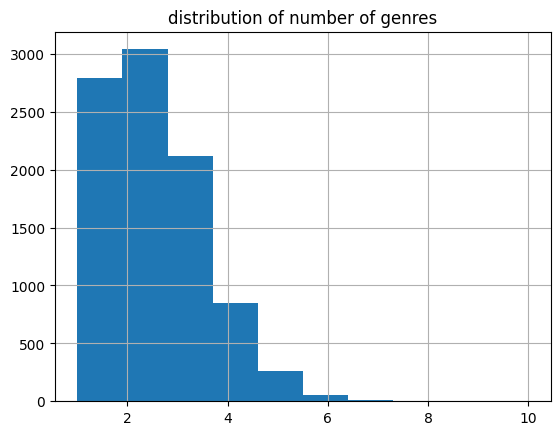

In [7]:
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [10]:
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)
frequent_itemsets_movies

/home/kodascii/.local/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.169315,(Action)
1,0.122411,(Adventure)
2,0.048986,(Animation)
3,0.063890,(Children)
4,0.363288,(Comedy)
5,0.120548,(Crime)
6,0.054247,(Documentary)
7,0.478356,(Drama)
8,0.071671,(Fantasy)
9,0.096110,(Horror)


In [ ]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)
rules_movies

In [ ]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)

In [ ]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]